In [263]:
import pandas as pd
import matplotlib.pyplot as plt
dpi = 200
plt.rcParams['figure.dpi'] = dpi
plt.rcParams['savefig.dpi'] = dpi
plt.style.use(['science','ieee', 'scatter'])
plt.rcParams['figure.figsize'] = 5,5

import numpy as np

In [264]:
csv = ['obs.txt']
titles = ['obs']

In [265]:
obs = pd.read_csv(csv[0], header=0, sep = '\t')

obs

,Cloud,long axes P.A.,B-field P.A. PLANCK,B P.A. Starlight,MCF Slope,SFR ref 4,SFR ref 3
0,Lupus-1,-1,86.0,-82.0,0.188,4.00,0.63
1,Cha-I-III,22,-76.0,NaN,0.165,NaN,1.03
2,Pipe,-45,59.0,49.0,0.165,2.81,NaN
3,IC5146,-38,67.0,64.0,0.231,NaN,0.38
4,Taurus,75,1.0,0.0,0.176,4.76,0.14
5,Musca,27,-82.0,NaN,0.195,NaN,0.90
6,Perseus,32,-84.0,59.0,0.206,7.98,1.46
7,Orion B,-30,-87.0,7.0,0.132,2.19,NaN
8,Orion A,83,59.0,7.0,0.159,5.21,NaN
9,Ophiuchus,-45,-81.0,-65.0,0.096,6.10,2.32


In [266]:
obs['b_offset_planck'] = np.abs(obs[obs.keys()[2]] - obs[obs.keys()[1]])
obs['b_offset_optical'] = np.abs(obs[obs.keys()[3]] - obs[obs.keys()[1]])

obs.loc[obs['b_offset_planck'] > 90, 'b_offset_planck'] = 180 - obs.loc[obs['b_offset_planck'] > 90, 'b_offset_planck'] 
obs.loc[obs['b_offset_optical'] > 90, 'b_offset_optical'] = 180 - obs.loc[obs['b_offset_optical'] > 90, 'b_offset_optical'] 

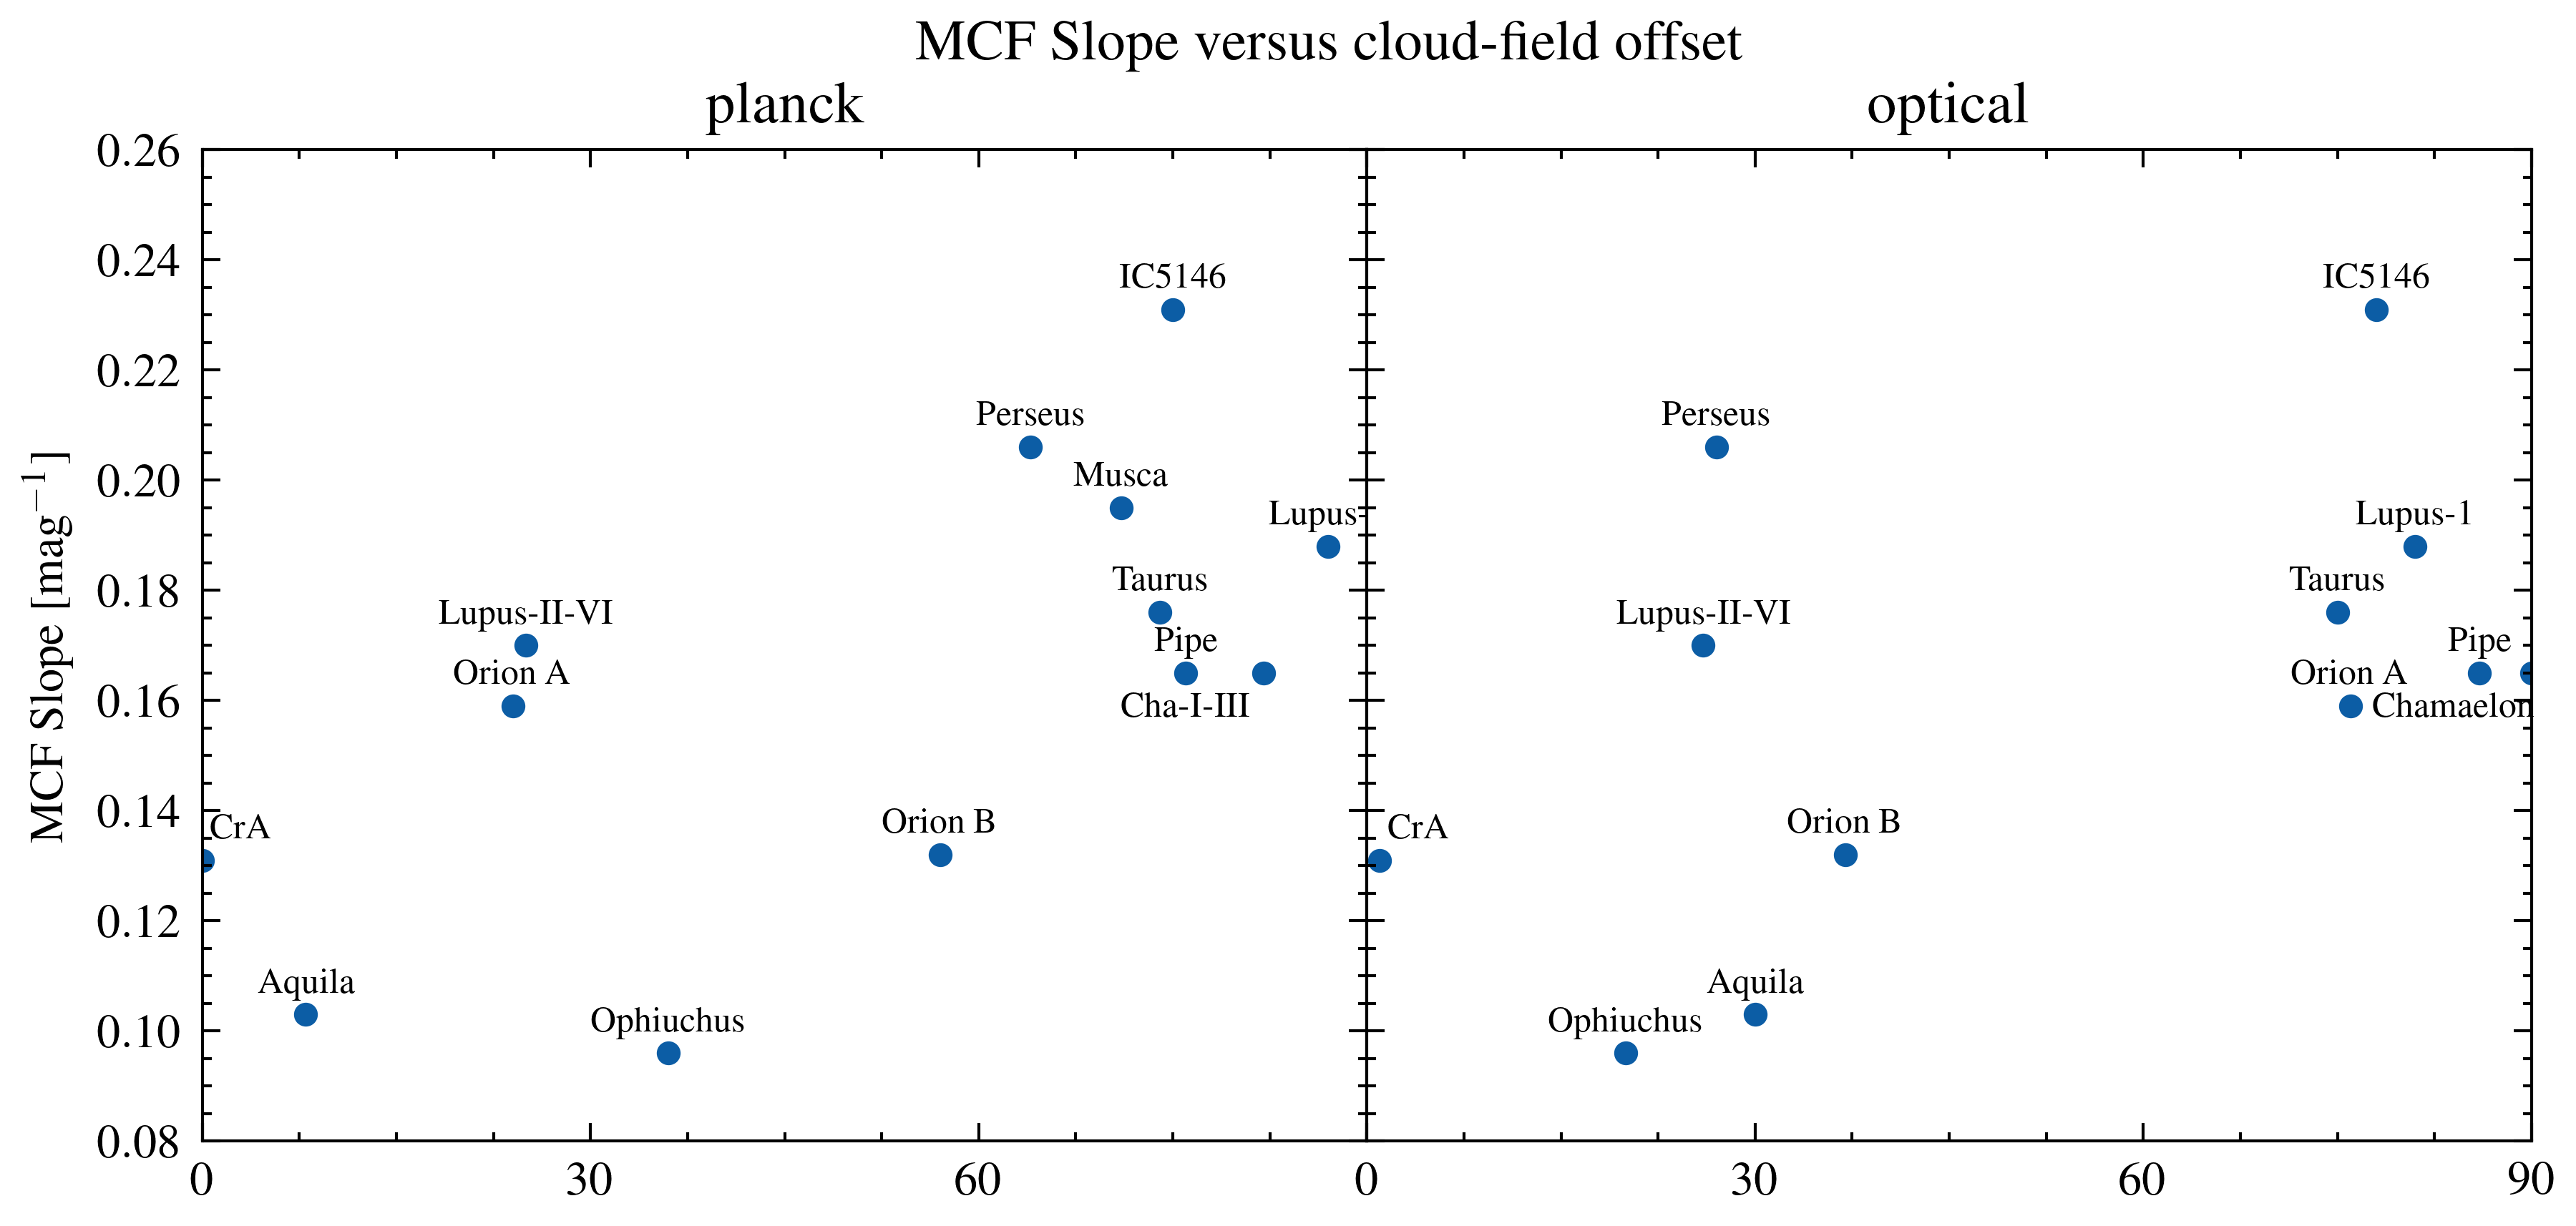

In [289]:
fig, ax = plt.subplots(1, 2, figsize = (7, 3), sharey = True)

names = ['planck', 'optical']

for i, name in enumerate(names):
    ax[i].scatter(obs[f'b_offset_{name}'], obs['MCF Slope'])

    for j, row in obs.iterrows():
        if ~np.isnan(row[f'b_offset_{name}']) and ~np.isnan(row[f'MCF Slope']):
            
            x = row[f'b_offset_{name}']
            y = row['MCF Slope'] + 0.004
            
            if row['Cloud'] == 'Chamaelon' or row['Cloud'] == 'Cha-I-III':
                y -= 0.012
                x -= 6
            
            if x < 4:
                x += 3
            
            ax[i].text(x, y, s = row['Cloud'], fontsize = 6, ha = 'center')

    ax[i].text(45, 0.265, s = name, ha = 'center', fontsize = 10)
    ax[i].set_xlim(0, 90)
    ax[i].set_ylim(0.08, 0.26)
    
ax[0].set_xticks([0, 30, 60])
ax[1].set_xticks([0, 30, 60, 90])
ax[0].set_ylabel(r'MCF Slope [mag$^{-1}$]')
fig.suptitle('MCF Slope versus cloud-field offset')
plt.subplots_adjust(wspace = 0)
plt.show()


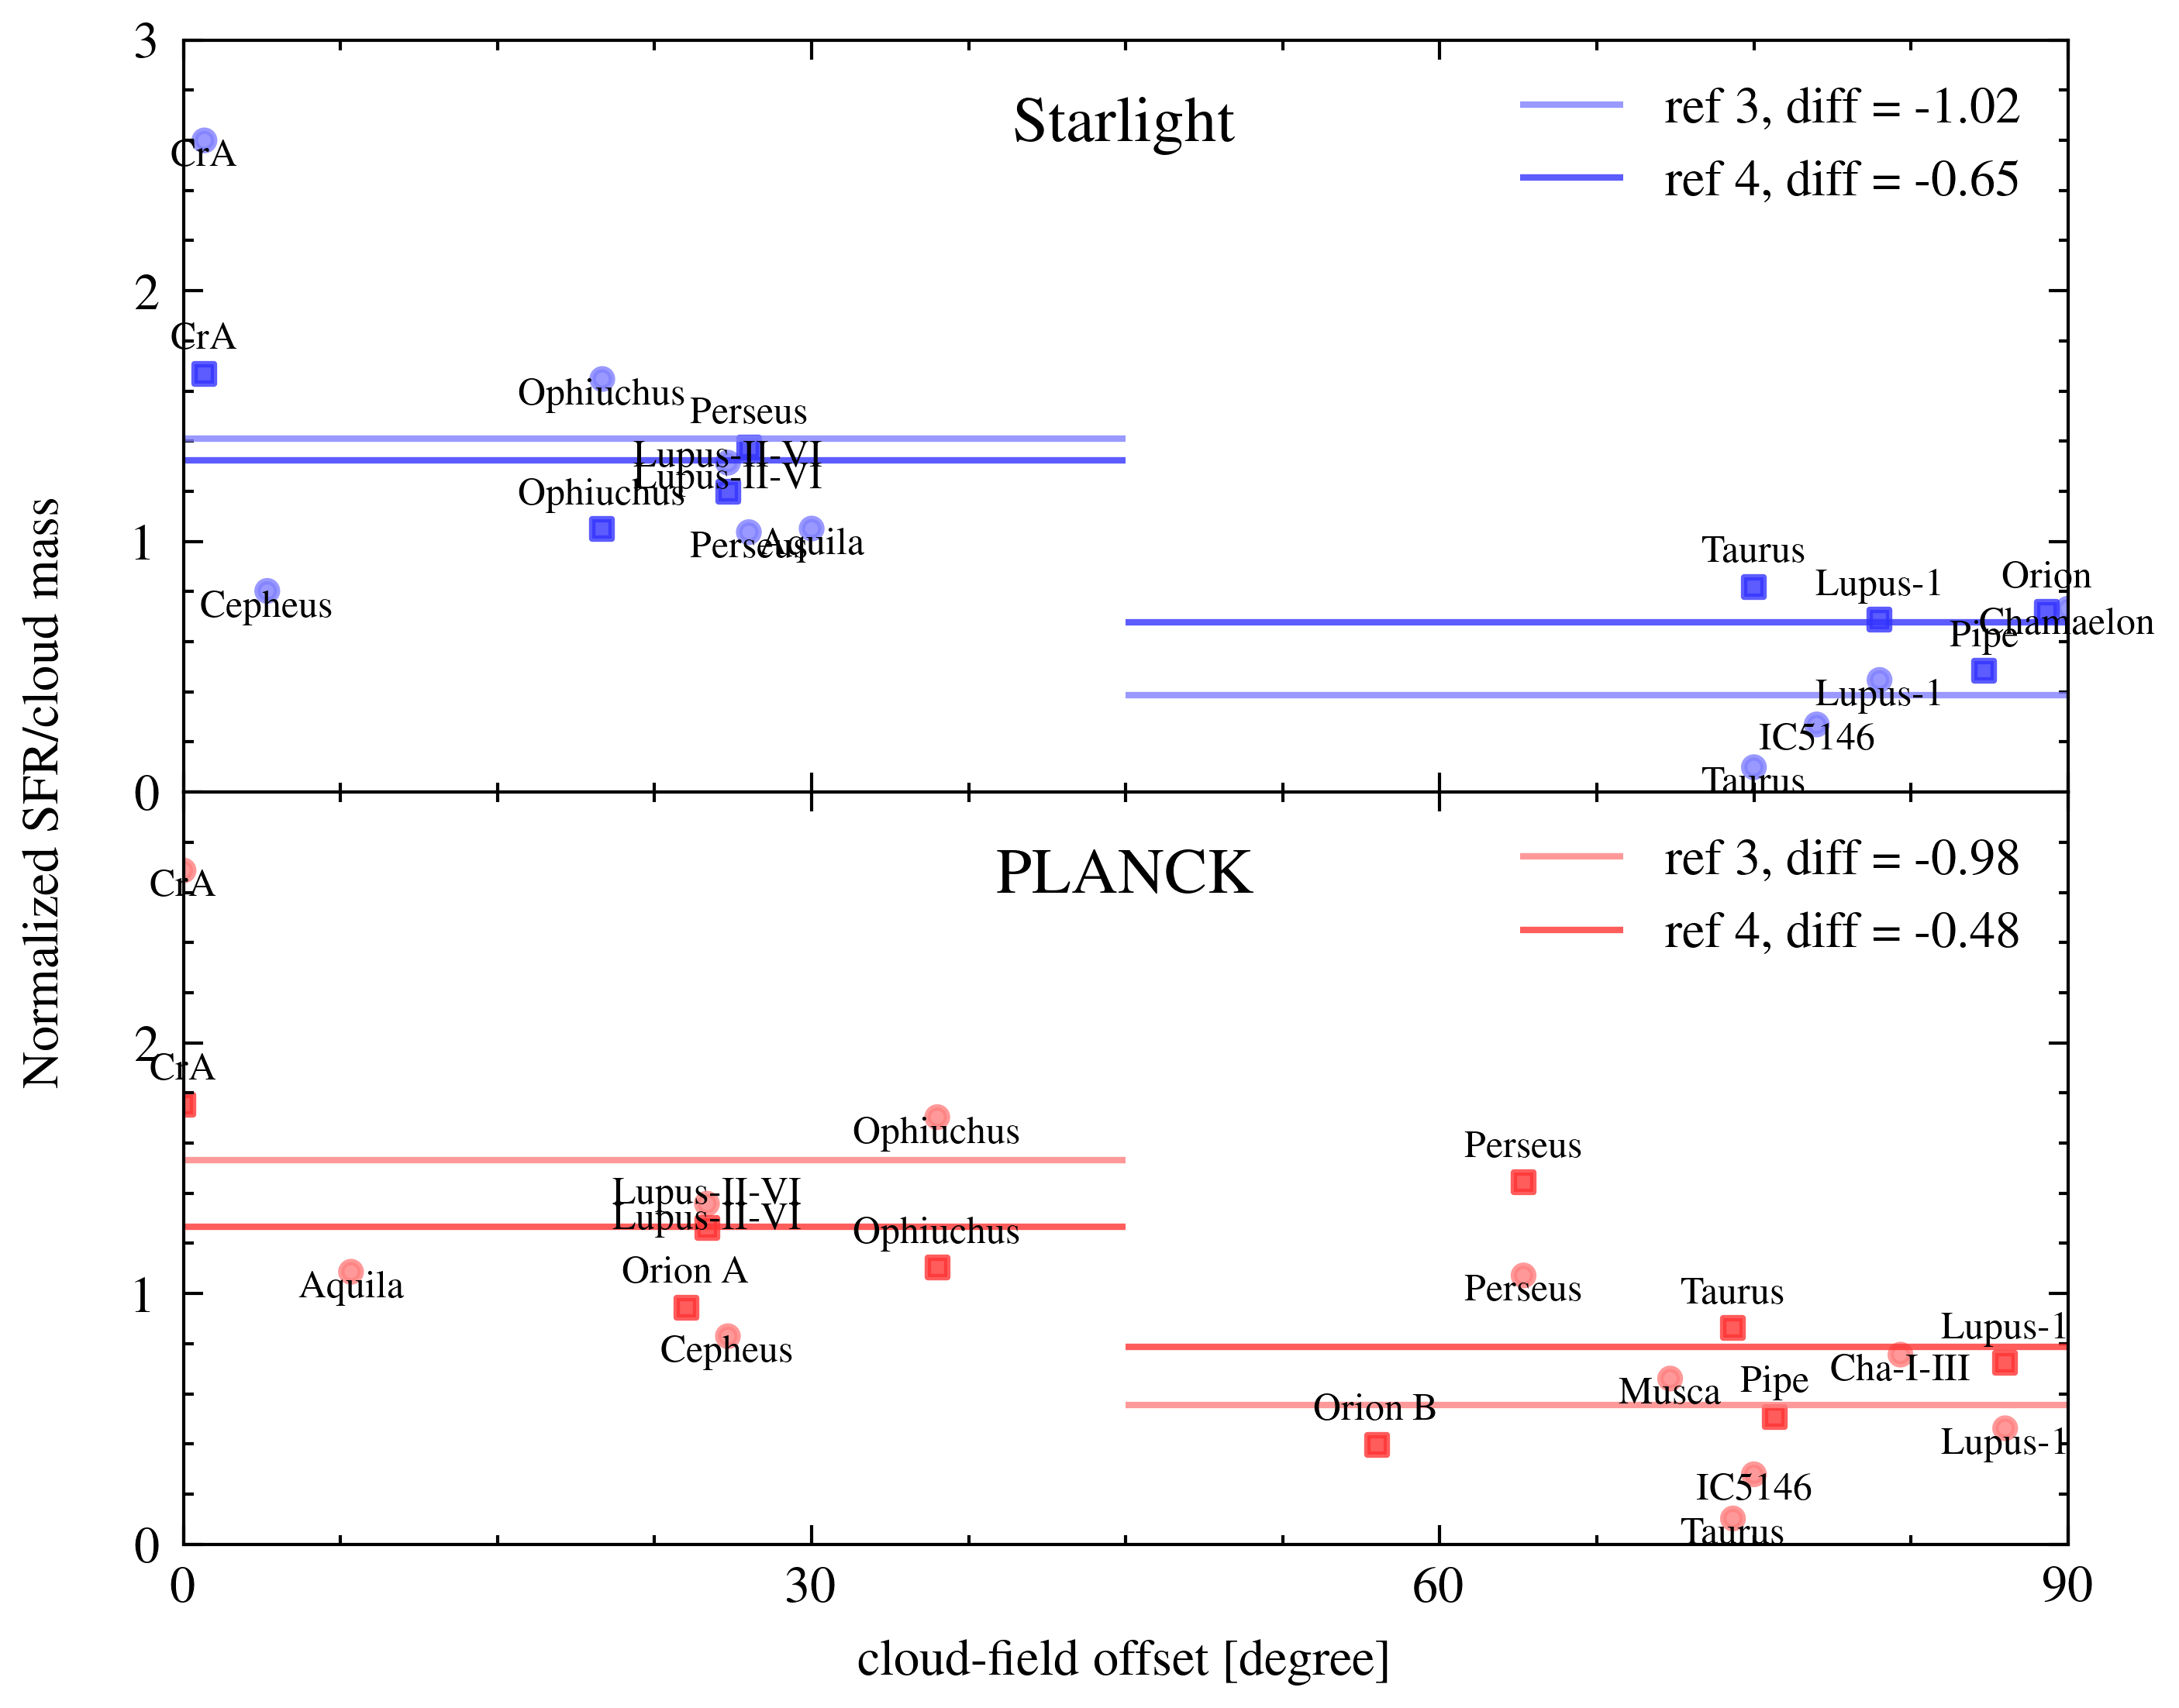

In [330]:
fig, ax = plt.subplots(2, 1, figsize = (5, 4), sharex = True)

criteria = np.logical_and(obs['Cloud'] != 'Orion A', obs['Cloud'] != 'Orion B')


clds = obs[f'Cloud'][criteria]
x = obs[f'b_offset_optical'][criteria]
y1 = obs[f'SFR ref 3'][criteria]
y2 = obs[f'SFR ref 4'][criteria]

criteria1 = np.logical_and(~np.isnan(x), ~np.isnan(y1))
criteria2 = np.logical_and(~np.isnan(x), ~np.isnan(y2))

x1 = x[criteria1]
y1 = y1[criteria1]
x2 = x[criteria2]
y2 = y2[criteria2]

y1 /= np.nanmean(y1)
y2 /= np.nanmean(y2)

ax[0].scatter(x1, y1, marker = 'o', c = [[0.5,0.5,1,.8] for i in range(len(x1))])
ax[0].scatter(x2, y2, marker = 's', c = [[0.2,0.2,1,.8] for i in range(len(x2))])


for i in x.keys():
    if i in x1.keys():
        ax[0].text(x1[i], y1[i]-0.1, s = clds [i], fontsize = 6, ha = 'center', color = [0,0,0,1])
    if i in x2.keys():
        ax[0].text(x2[i], y2[i]+0.1, s = clds [i], fontsize = 6, ha = 'center', color = [0,0,0,1])


ax[0].hlines(np.mean(y1[x1 < 45]),0, 45, color = [0.5,0.5,1,.8], lw = 1)
ax[0].hlines(np.mean(y1[x1 > 45]),45, 90, color = [0.5,0.5,1,.8], lw = 1, label = f'ref 3, diff = {np.mean(y1[x1 > 45]) - np.mean(y1[x1 < 45]):.2f}')
ax[0].hlines(np.mean(y2[x2 < 45]),0, 45, color = [0.2,0.2,1,.8], lw = 1)
ax[0].hlines(np.mean(y2[x2 > 45]),45, 90, color = [0.2,0.2,1,.8], lw = 1, label = f'ref 4, diff = {np.mean(y2[x2 > 45]) - np.mean(y2[x2 < 45]):.2f}')


x = obs[f'b_offset_planck']
clds = obs[f'Cloud']
y1 = obs[f'SFR ref 3']
y2 = obs[f'SFR ref 4']

criteria1 = np.logical_and(~np.isnan(x), ~np.isnan(y1))
criteria2 = np.logical_and(~np.isnan(x), ~np.isnan(y2))

x1 =  x[criteria1]
y1 = y1[criteria1]
x2 =  x[criteria2]
y2 = y2[criteria2]

y1 /= np.nanmean(y1)
y2 /= np.nanmean(y2)

ax[1].scatter(x1, y1, marker = 'o', c = [[1,0.5,0.5,.8] for i in range(len(x1))])
ax[1].scatter(x2, y2, marker = 's', c = [[1,0.2,0.2,.8] for i in range(len(x2))])

for i in x.keys():
    if i in x1.keys():
        ax[1].text(x1[i], y1[i]-0.1, s = clds [i], fontsize = 6, ha = 'center', color = [0,0,0,1])
    if i in x2.keys():
        ax[1].text(x2[i], y2[i]+0.1, s = clds [i], fontsize = 6, ha = 'center', color = [0,0,0,1])


ax[1].hlines(np.mean(y1[x1 < 45]),0, 45, color = [1,0.5,0.5,.8], lw = 1)
ax[1].hlines(np.mean(y1[x1 > 45]),45, 90, color = [1,0.5,0.5,.8], lw = 1, label = f'ref 3, diff = {np.mean(y1[x1 > 45]) - np.mean(y1[x1 < 45]):.2f}')
ax[1].hlines(np.mean(y2[x2 < 45]),0, 45, color = [1,0.2,0.2,.8], lw = 1)
ax[1].hlines(np.mean(y2[x2 > 45]),45, 90, color = [1,0.2,0.2,.8], lw = 1, label = f'ref 4, diff = {np.mean(y2[x2 > 45]) - np.mean(y2[x2 < 45]):.2f}')


for i in ax:
    i.set_ylim(0, 3)
    i.set_xlim(0, 90)
    # i.grid()
    i.legend()




ax[0].text(45, 2.6, "Starlight", ha = 'center', fontsize = 10)
ax[1].text(45, 2.6, "PLANCK", ha = 'center', fontsize = 10)


ax[0].set_yticks([0, 1, 2, 3])
ax[1].set_yticks([0, 1, 2])
ax[1].set_xticks([0, 30, 60, 90])

fig.add_subplot(111, frameon=False)
plt.tight_layout()
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)

plt.xlabel('cloud-field offset [degree]')
plt.ylabel('Normalized SFR/cloud mass')
# ax[0].grid()
plt.tight_layout()
plt.subplots_adjust(hspace = 0)
plt.show()
